In [ ]:
import os

os.environ['TORCH_USE_CUDA_DSA'] = '1'

In [ ]:
!pip show torch

Name: torch
Version: 2.2.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-nccl-cu12, nvidia-nvtx-cu12, sympy, triton, typing-extensions
Required-by: accelerate, fastai, torchaudio, torchdata, torchtext, torchvision


In [ ]:
!pip install accelerate -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install transformers==4.27.4 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 35.3 MB/s eta 0:00:00


In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.9 MB/s eta 0:00:00


In [ ]:
from transformers import EsmTokenizer, EsmForTokenClassification, Trainer,TrainingArguments
from transformers import EsmConfig
from datasets import Dataset,DatasetDict,Sequence,ClassLabel
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn.functional as F
import numpy as np
import random
import os
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef,roc_auc_score,average_precision_score

In [ ]:
TOKENIZER = 'facebook/esm2_t12_35M_UR50D'

tokenizer = EsmTokenizer.from_pretrained(TOKENIZER, max_len=800)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

In [ ]:
train_df = pd.read_parquet('/content/drive/MyDrive/GlcLM/500_800/data_train.parquet')
val_df = pd.read_parquet('/content/drive/MyDrive/GlcLM/500_800/data_val.parquet')
test_df = pd.read_parquet('/content/drive/MyDrive/GlcLM/500_800/data_test.parquet')

In [ ]:
train_df

,sequence,oglcnac sites,Labeled_Sequence,Sequence_Length
0,MAGSRQRGLRARVRPLFCALLLSLGRFVRGDGVGGDPAVALPHRRF...,S4;S365;T433,"[N, N, N, G, N, N, N, N, N, N, N, N, N, N, N, ...",511
1,MRSAARRGRAAPAARDSLPVLLFLCLLLKTCEPKTANAFKPNILLI...,S355,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",594
2,MAFSELLDLVGGLGRFQVLQTMALMVSIMWLCTQSMLENFSAAVPS...,T503;S508,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",554
3,MAAALRVAAVGARLSVLASGLRAAVRSLCSQATSVNERIENKRRTA...,T45,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",540
4,MASVSALTEELDSITSELHAVEIQIQELTERQQELIQKKKVLTKKI...,S634,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",650
...,...,...,...,...
885,MESAPAAPDPAASEPGSSGADAAAGSRETPLNQESARKSEPPAPVR...,S49;T328,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",524
886,MNQELLSVGSKRRRTGGSLRGNPSSSQVDEEQMNRVVEEEQQQQLR...,S180,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",708
887,MEGKWLLCMLLVLGTAIVEAHDGHDDDVIDIEDDLDDVIEEVEDSK...,T59;T66,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",593
888,MYALFLLASLLGAALAGPVLGLKECTRGSAVWCQNVKTASDCGAVK...,T82;T93;S103;S105;T214;S216;T334;S427,"[N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, ...",525


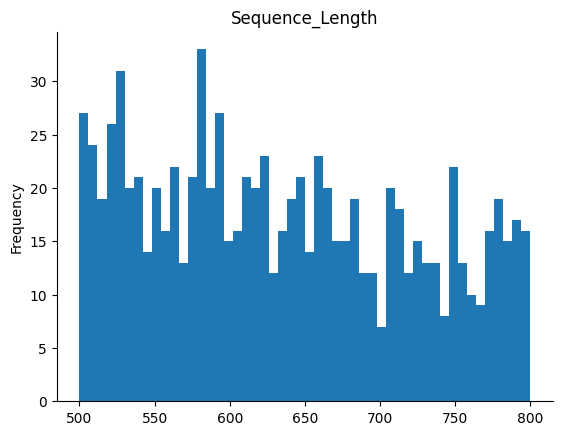

In [ ]:
from matplotlib import pyplot as plt
train_df['Sequence_Length'].plot(kind='hist', bins=50, title='Sequence_Length')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
import pyarrow.parquet as pq

table = pq.read_table('/content/drive/MyDrive/GlcLM/500_800/data_train.parquet')

In [ ]:
table

pyarrow.Table
sequence: string
oglcnac sites: string
Labeled_Sequence: list<element: string>
  child 0, element: string
Sequence_Length: int64
----
sequence: [["MAGSRQRGLRARVRPLFCALLLSLGRFVRGDGVGGDPAVALPHRRFEYKYSFKGPHLVQSDGTVPFWAHAGNAIPSSDQIRVAPSLKSQRGSVWTKTKAAFENWEVEVTFRVTGRGRIGADGLAIWYAENQGLEGPVFGSADLWNGVGIFFDSFDNDGKKNNPAIVIIGNNGQIHYDHQNDGASQALASCQRDFRNKPYPVRAKITYYQNTLTVMINNGFTPDKNDYEFCAKVENMIIPAQGHFGISAATGGLADDHDVLSFLTFQLTEPGKEPPTPDKEISEKEKEKYQEEFEHFQQELDKKKEEFQKGHPDLQGQPAEEIFESVGDRELRQVFEGQNRIHLEIKQLNRQLDMILDEQRRYVSSLTEEISKRGAGMPGQHGQITQQELDTVVKTQHEILRQVNEMKNSMSETVRLVSGMQHPGSAGGVYETTQHFIDIKEHLHIVKRDIDNLVQRNMPSNEKPKCPELPPFPSCLSTVHFIIFVVVQTVLFIGYIMYRSQQEAAAKKFF ","MRSAARRGRAAPAARDSLPVLLFLCLLLKTCEPKTANAFKPNILLIMADDLGTGDLGCYGNNTLRTPNIDQLAEEGVRLTQHLAAAPLCTPSRAAFLTGRHSFRSGMDASNGYRALQWNAGSGGLPENETTFARILQQHGYATGLIGKWHQGVNCASRGDHCHHPLNHGFDYFYGMPFTLTNDCDPGRPPEVDAALRAQLWGYTQFLALGILTLAAGQTCGFFSVSARAVTGMAGVGCLFFISWYSSFGFVRRWNCILMRNHDVTEQPMVLEKTASLMLKEAVSYIERHKHGPFLLFLSLLHVHIPLVTTSAFLGKSQHGLYGDN

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sequence          890 non-null    object
 1   oglcnac sites     890 non-null    object
 2   Labeled_Sequence  890 non-null    object
 3   Sequence_Length   890 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.9+ KB


In [ ]:
gly_dataset = DatasetDict({
    "train": Dataset.from_pandas(train_df[['sequence', 'Labeled_Sequence']]),
    "test": Dataset.from_pandas(test_df[['sequence', 'Labeled_Sequence']]),
    "validation": Dataset.from_pandas(val_df[['sequence', 'Labeled_Sequence']])
    })

In [ ]:
print(gly_dataset)

DatasetDict({
    train: Dataset({
        features: ['sequence', 'Labeled_Sequence'],
        num_rows: 890
    })
    test: Dataset({
        features: ['sequence', 'Labeled_Sequence'],
        num_rows: 111
    })
    validation: Dataset({
        features: ['sequence', 'Labeled_Sequence'],
        num_rows: 112
    })
})


In [ ]:
gly_dataset['train'].select(range(1))['sequence']


['MAGSRQRGLRARVRPLFCALLLSLGRFVRGDGVGGDPAVALPHRRFEYKYSFKGPHLVQSDGTVPFWAHAGNAIPSSDQIRVAPSLKSQRGSVWTKTKAAFENWEVEVTFRVTGRGRIGADGLAIWYAENQGLEGPVFGSADLWNGVGIFFDSFDNDGKKNNPAIVIIGNNGQIHYDHQNDGASQALASCQRDFRNKPYPVRAKITYYQNTLTVMINNGFTPDKNDYEFCAKVENMIIPAQGHFGISAATGGLADDHDVLSFLTFQLTEPGKEPPTPDKEISEKEKEKYQEEFEHFQQELDKKKEEFQKGHPDLQGQPAEEIFESVGDRELRQVFEGQNRIHLEIKQLNRQLDMILDEQRRYVSSLTEEISKRGAGMPGQHGQITQQELDTVVKTQHEILRQVNEMKNSMSETVRLVSGMQHPGSAGGVYETTQHFIDIKEHLHIVKRDIDNLVQRNMPSNEKPKCPELPPFPSCLSTVHFIIFVVVQTVLFIGYIMYRSQQEAAAKKFF ']

In [ ]:
print(type(gly_dataset))

<class 'datasets.dataset_dict.DatasetDict'>


In [ ]:
print(gly_dataset['train'].select(range(1))['Labeled_Sequence'][0][0:15])


['N', 'N', 'N', 'G', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']


In [ ]:
gly_dataset['train'].features


{'sequence': Value(dtype='string', id=None),
 'Labeled_Sequence': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
gly_class_label = ClassLabel(2,names=['N','G'])
new_feature = Sequence(gly_class_label)

In [ ]:
gly_dataset_featurised = gly_dataset.map(
    lambda seq, labels: {
        "sequence" : seq,
        "Labeled_Sequence" : [gly_class_label.str2int(sample) for sample in labels]
    },
    input_columns=["sequence", "Labeled_Sequence"], batched=True
)

In [ ]:
feature_set_copy = gly_dataset['train'].features.copy()
feature_set_copy

{'sequence': Value(dtype='string', id=None),
 'Labeled_Sequence': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)}

In [ ]:
feature_set_copy['Labeled_Sequence'] = new_feature

In [ ]:
gly_dataset_featurised = gly_dataset_featurised.cast(feature_set_copy)


In [ ]:
gly_dataset_featurised['train'].features


{'sequence': Value(dtype='string', id=None),
 'Labeled_Sequence': Sequence(feature=ClassLabel(names=['N', 'G'], id=None), length=-1, id=None)}

In [ ]:
print(gly_dataset_featurised['train'].select(range(1))['Labeled_Sequence'][0][200:350])


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
def preprocess(batch):
    # Tokenize without fixed max_length and padding
    t_inputs = tokenizer(batch['sequence'], truncation=True, padding=False)

    batch['input_ids'] = t_inputs['input_ids']
    batch['attention_mask'] = t_inputs['attention_mask']

    labels_container = []
    for index, labels in enumerate(batch['Labeled_Sequence']):
        # Note: No need to adjust labels here for padding, as we'll dynamically pad later
        labels_container.append([-250] + labels + [-250])  # Adjusting for special tokens only

    batch['labels'] = labels_container

    return batch


In [ ]:
def preprocess_data(examples, max_length=800):
    text = examples["sequence"]
    encoding = tokenizer(text, truncation=True, max_length=max_length)
    encoding["labels"] = examples["Labeled_Sequence"]
    return encoding

In [ ]:
gly_dataset_tokenized = gly_dataset_featurised.map(
    preprocess_data,
    batched=True,
    batch_size=4,
    remove_columns=['sequence', 'Labeled_Sequence']
)

In [ ]:
gly_dataset_tokenized

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 890
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 111
    })
    validation: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 112
    })
})

In [ ]:
from datasets import DatasetDict
dataset_dict = DatasetDict(gly_dataset_tokenized)

# Convert DatasetDict to pandas DataFrame
dfs = {}
for subset_name, subset in dataset_dict.items():
    dfs[subset_name] = pd.DataFrame(subset)

# View the DataFrames
for subset_name, df in dfs.items():
    print(f"{subset_name} DataFrame:")
    print(df)
    print()


train DataFrame:
                                             input_ids  \
0    [0, 20, 5, 6, 8, 10, 16, 10, 6, 4, 10, 5, 10, ...   
1    [0, 20, 10, 8, 5, 5, 10, 10, 6, 10, 5, 5, 14, ...   
2    [0, 20, 5, 18, 8, 9, 4, 4, 13, 4, 7, 6, 6, 4, ...   
3    [0, 20, 5, 5, 5, 4, 10, 7, 5, 5, 7, 6, 5, 10, ...   
4    [0, 20, 5, 8, 7, 8, 5, 4, 11, 9, 9, 4, 13, 8, ...   
..                                                 ...   
885  [0, 20, 9, 8, 5, 14, 5, 5, 14, 13, 14, 5, 5, 8...   
886  [0, 20, 17, 16, 9, 4, 4, 8, 7, 6, 8, 15, 10, 1...   
887  [0, 20, 9, 6, 15, 22, 4, 4, 23, 20, 4, 4, 7, 4...   
888  [0, 20, 19, 5, 4, 18, 4, 4, 5, 8, 4, 4, 6, 5, ...   
889  [0, 20, 5, 9, 5, 14, 16, 7, 7, 9, 12, 13, 14, ...   

                                        attention_mask  \
0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
1    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
2    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...   
3    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...

In [ ]:
gly_dataset_tokenized.set_format("torch")

In [ ]:
from sklearn.metrics import accuracy_score
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    # Convert logits to class predictions
    preds = np.argmax(predictions, axis=2)

    # Flatten everything to avoid sequence dimension
    true_labels = labels.flatten()
    pred_labels = preds.flatten()

    # Calculate precision, recall, F1-score, and accuracy
    precision = precision_score(true_labels, pred_labels, average='weighted')
    recall = recall_score(true_labels, pred_labels, average='weighted')
    f1 = f1_score(true_labels, pred_labels, average='weighted')
    accuracy = accuracy_score(true_labels, pred_labels)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

In [ ]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

batch_size = 8
RUN_ID = "/content/GlyLM"
LR = 1e-5
SEED = 0

args = TrainingArguments(
    f"{RUN_ID}_{SEED}",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    learning_rate=LR,  # 1e-6, 5e-6, 1e-5. .... 1e-3
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=10,
    gradient_accumulation_steps=16,
    warmup_ratio=0.1,  # 0, 0.05, 0.1 ....
    load_best_model_at_end=True,
    lr_scheduler_type='linear',
    logging_strategy='epoch',
    seed=SEED
)


In [ ]:
def set_seed(seed: int = 42):
    """
    Set all seeds to make results reproducible (deterministic mode).
    When seed is None, disables deterministic mode.
    """
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [ ]:
set_seed(SEED)

MODEL_DIR = 'facebook/esm2_t12_35M_UR50D'
model = EsmForTokenClassification.from_pretrained(MODEL_DIR, num_labels=2)

trainer = Trainer(
    model,
    args=args,
    tokenizer=tokenizer,
    train_dataset=gly_dataset_tokenized['train'],
    eval_dataset=gly_dataset_tokenized['validation'],
    compute_metrics=compute_metrics,
    data_collator=data_collator
)

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.743900,0.722084,0.255425,0.678890,0.255425,0.368449
2,0.692900,0.655114,0.591408,0.722454,0.591408,0.650000
3,0.627100,0.586941,0.738062,0.674416,0.738062,0.704732
4,0.556200,0.513472,0.782446,0.654959,0.782446,0.713033
5,0.480200,0.434480,0.799719,0.651230,0.799719,0.717876
6,0.400000,0.356960,0.805346,0.650957,0.805346,0.719963
7,0.325700,0.290856,0.806604,0.651084,0.806604,0.720548
8,0.267800,0.242677,0.806862,0.651125,0.806862,0.720676
9,0.229800,0.215548,0.806929,0.651135,0.806929,0.720709
10,0.211600,0.206516,0.806929,0.651135,0.806929,0.720709


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

TrainOutput(global_step=70, training_loss=0.4535218834877014, metrics={'train_runtime': 1037.4043, 'train_samples_per_second': 8.579, 'train_steps_per_second': 0.067, 'total_flos': 1352345949002340.0, 'train_loss': 0.4535218834877014, 'epoch': 10.0})

In [ ]:
trainer.train(resume_from_checkpoint=True)

In [ ]:
model = EsmForTokenClassification.from_pretrained(
    f"/content/drive/My Drive/GlyLM_0_esm2_t12_35M/checkpoint-70"
)

In [ ]:
pred = trainer.predict(
    gly_dataset_tokenized['test']
)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred.metrics

{'test_loss': 0.752582311630249,
 'test_accuracy': 0.14546667118812664,
 'test_precision': 0.5794664450633357,
 'test_recall': 0.14546667118812664,
 'test_f1': 0.2280735774526639,
 'test_runtime': 409.062,
 'test_samples_per_second': 0.271,
 'test_steps_per_second': 0.034}

<ipython-input-59-61561f4197ff>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=metric_names, palette=palt)
<ipython-input-59-61561f4197ff>:26: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.barplot(x=metric_values, y=metric_names, palette=palt)


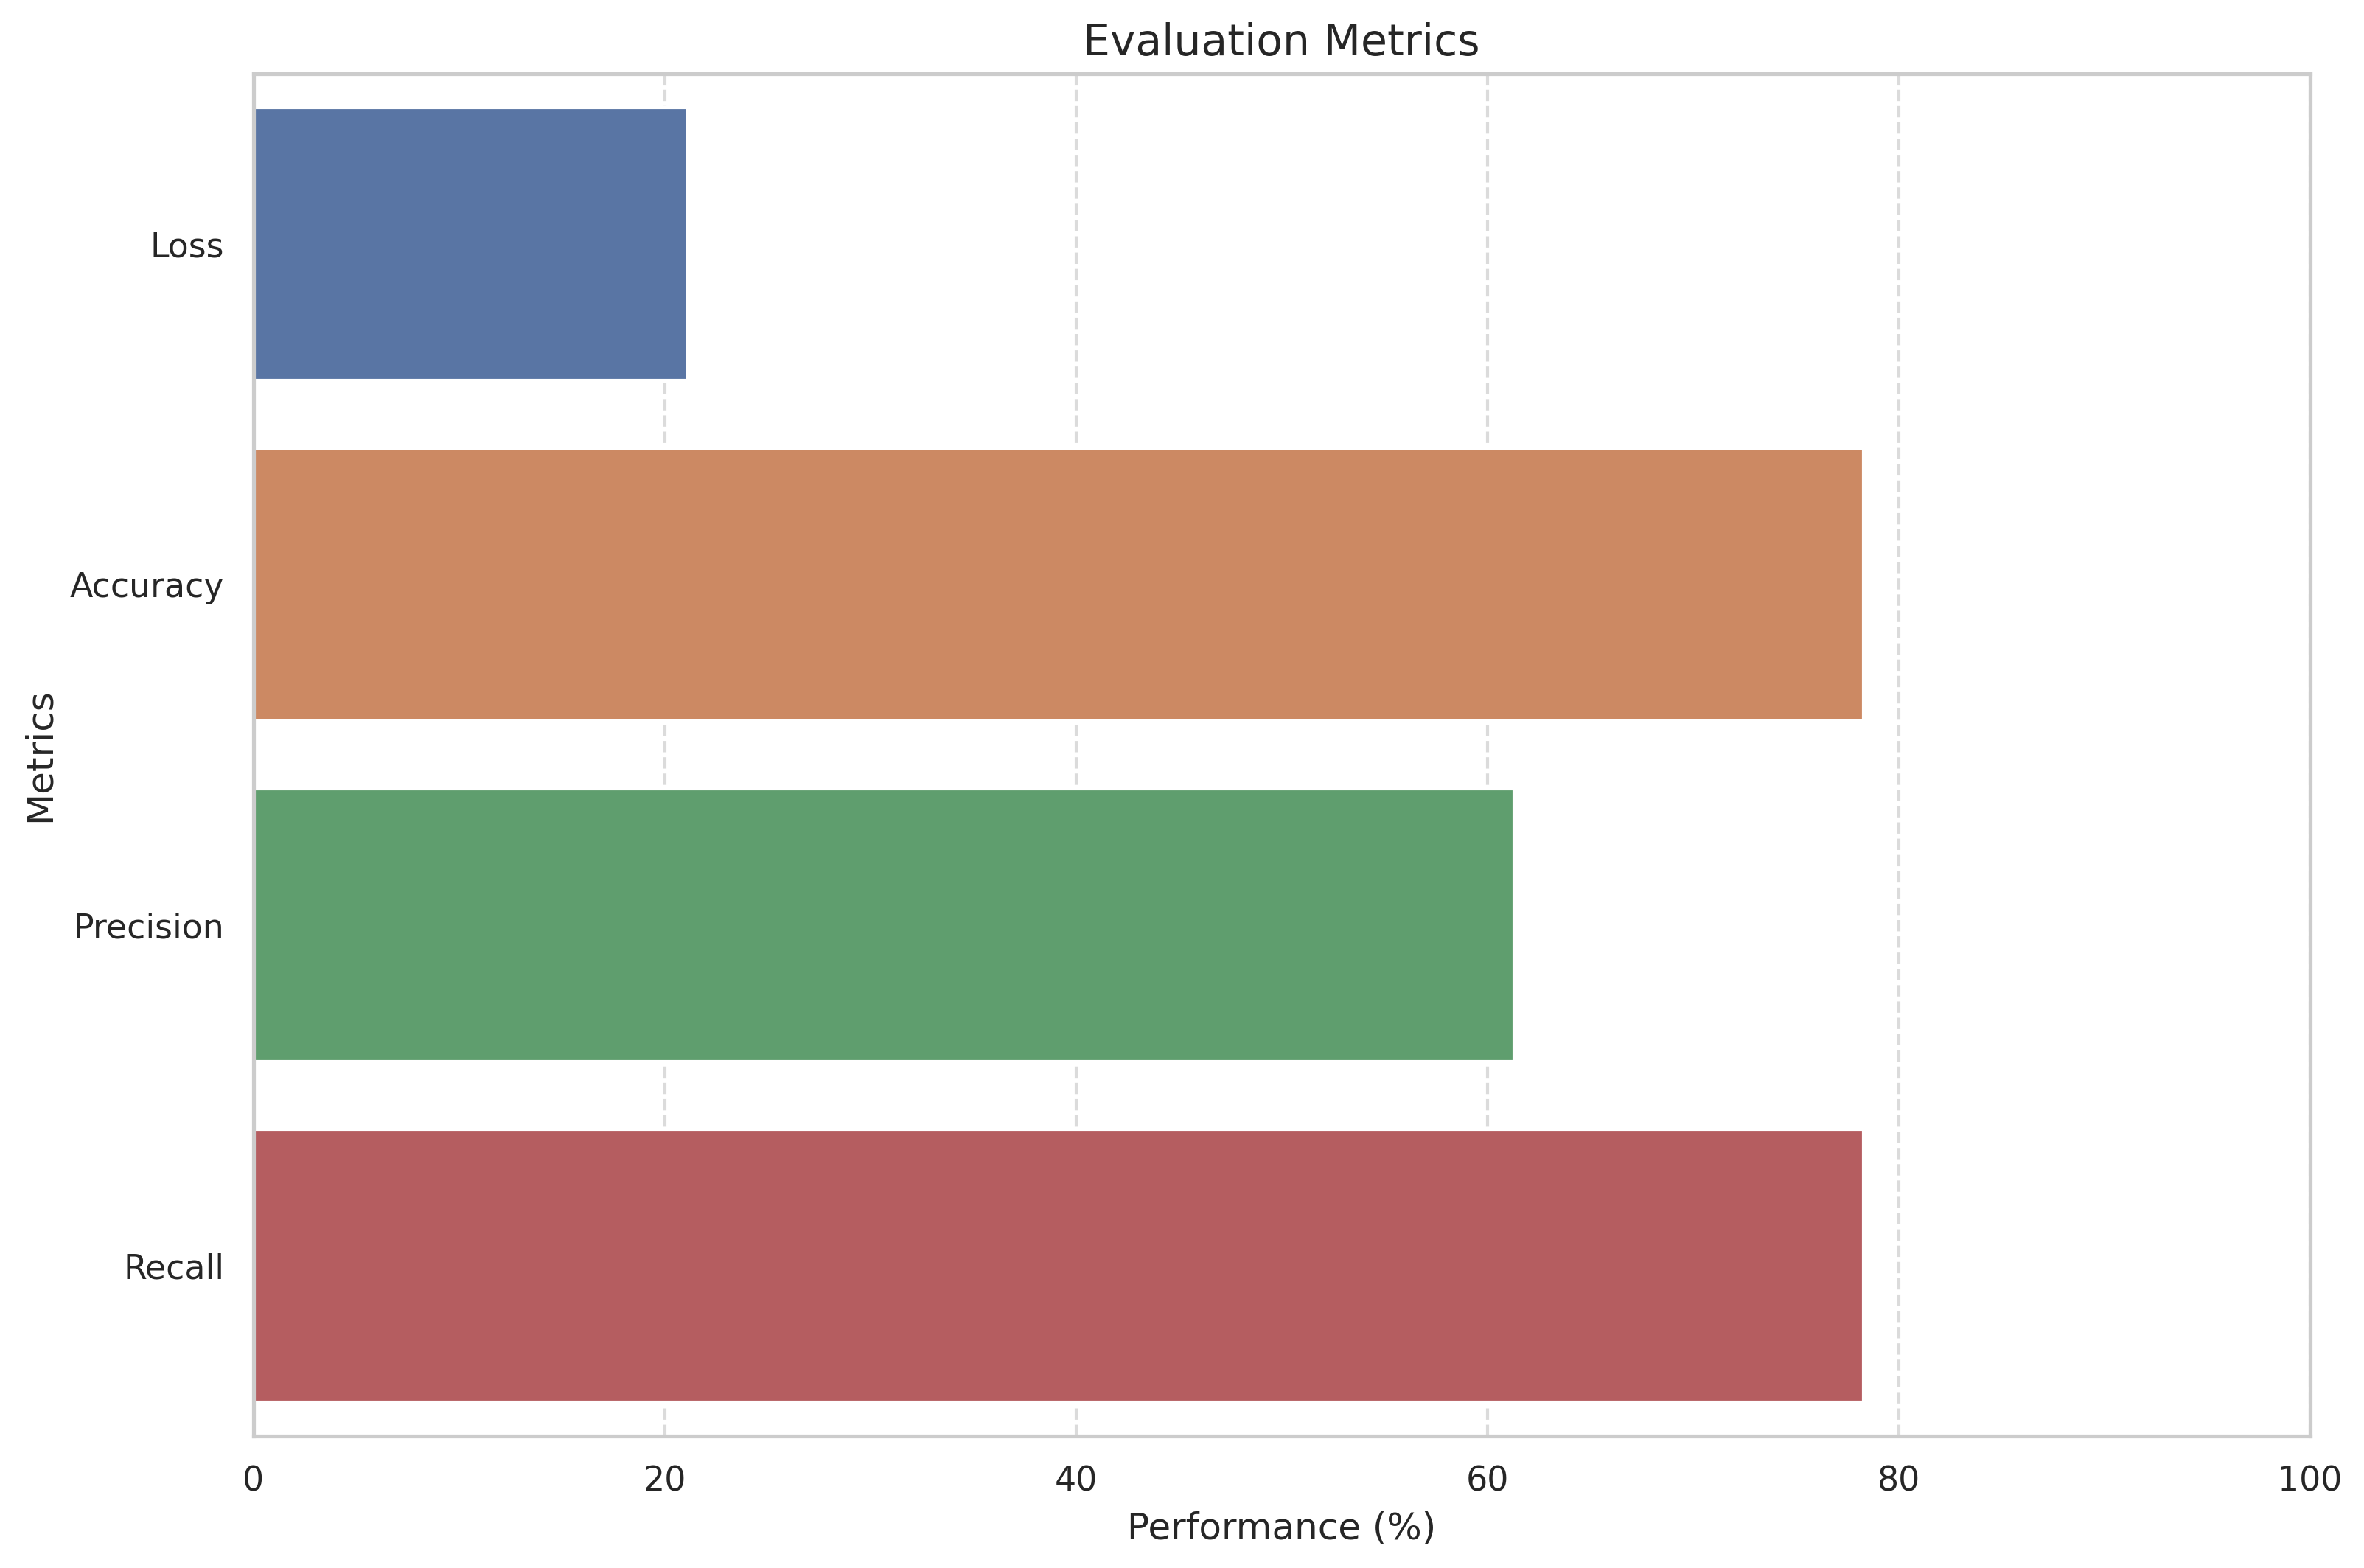

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluation metrics
metrics = {
    'test_loss': 0.21110840141773224,
    'test_accuracy': 0.7830264392372297,
    'test_precision': 0.613130404544535,
    'test_recall': 0.7830264392372297,
    'test_f1': 0.6877412370921759,
    'test_runtime': 4.6412,
    'test_samples_per_second': 23.916,
    'test_steps_per_second': 3.016
}

# Extracting relevant metrics for plotting
metric_names = ['Loss', 'Accuracy', 'Precision', 'Recall'
]
metric_values = [metrics.get(f'test_{metric.lower()}', 0) * 100 for metric in metric_names]

# Setting up Seaborn style
sns.set(style="whitegrid")
palt = sns.color_palette()
# Creating the bar plot
plt.figure(figsize=(12,  8), dpi=300)
sns.barplot(x=metric_values, y=metric_names, palette=palt)

plt.xlabel('Performance (%)', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Evaluation Metrics', fontsize=14)

plt.xlim(0, 100)  # Adjust xlim if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('/content/eval.png')
plt.show()

